In [3]:
import sys
import csv
import numpy as np

import sklearn
import sklearn.utils as utils
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import preprocessing

from plotting_tools import *
sys.path.insert(0, '/home/IPAMNET/lmzertuche/Documents/LIGO_ML/IPAM2021_ML')
from read_data import *

In [4]:
from sklearn.gaussian_process.kernels import DotProduct, RationalQuadratic, RBF, ConstantKernel, WhiteKernel

## Training

In [9]:
#Do this for every set and version of the csv available
xtrain = extractData('../NewRealistic/v0c0train_x.csv')
ytrain = extractData('../NewRealistic/v0c0train_y.csv')
xtest = extractData('../NewRealistic/v0c0test_x.csv')
ytest = extractData('../NewRealistic/v0c0test_y.csv')

In [10]:
xtrain = xtrain[:,:-1]
ytrain = ytrain[:,:-1]
xtest = xtest[:,:-1]
ytest = ytest[:,:-1]

In [11]:
xtrain = utils.shuffle(xtrain, random_state=5)
ytrain = utils.shuffle(ytrain, random_state=5)
xtest = utils.shuffle(xtest, random_state=42)
ytest = utils.shuffle(ytest, random_state=42)

In [12]:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
scaler = preprocessing.StandardScaler().fit(xtest)
xtest_scaled = scaler.transform(xtest)
scaler = preprocessing.StandardScaler().fit(ytrain)
ytrain_scaled = scaler.transform(ytrain)
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)

Make mini batches

In [13]:
%%time
R2_scores = []
predicted_data_all = []
j=0
for i in np.arange(0,18000+1,2000):
    j += 2000
    xtrain_scaled_batch = xtrain_scaled[i:j,:]
    ytrain_scaled_batch = ytrain_scaled[i:j,:]
    k = int(i*.3); l = int(j*.3)
    xtest_scaled_batch = xtest_scaled[k:l,:]
    ytest_scaled_batch = ytest_scaled[k:l,:]
    
    kernel = ConstantKernel() *  RBF() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=3, copy_X_train=False)
    gpr.fit(xtrain_scaled_batch, ytrain_scaled_batch)
    predicted_data_batch, std = gpr.predict(xtest_scaled_batch, return_std=True)
    predicted_data_all.append(predicted_data_batch)
    R2_scores.append(gpr.score(xtest_scaled_batch, ytest_scaled_batch))

CPU times: user 34min 40s, sys: 9min 54s, total: 44min 34s
Wall time: 13min 3s


In [14]:
R2_mean = sum(R2_scores)/len(R2_scores)
print(R2_mean)

0.8971022965107037


In [15]:
predicted_data_towrite = [*predicted_data_all[0], *predicted_data_all[1],
                         *predicted_data_all[2], *predicted_data_all[3],
                         *predicted_data_all[4], *predicted_data_all[5],
                         *predicted_data_all[6], *predicted_data_all[7],
                         *predicted_data_all[8], *predicted_data_all[9]]

In [ ]:
writeResult('GPR_test.csv',predicted_data_towrite)

In [ ]:
writeResult('GPR_C+RBF+W_minibatch_v0c0.csv',predicted_data_towrite)

### More

In [ ]:
xtrain = extractData('../NewRealistic/v0c1train_x.csv')
ytrain = extractData('../NewRealistic/v0c1train_y.csv')
xtest = extractData('../NewRealistic/v0c1test_x.csv')
ytest = extractData('../NewRealistic/v0c1test_y.csv')
xtrain = xtrain[:,:-1]
ytrain = ytrain[:,:-1]
xtest = xtest[:,:-1]
ytest = ytest[:,:-1]
xtrain = utils.shuffle(xtrain, random_state=5)
ytrain = utils.shuffle(ytrain, random_state=5)
xtest = utils.shuffle(xtest, random_state=42)
ytest = utils.shuffle(ytest, random_state=42)
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
scaler = preprocessing.StandardScaler().fit(xtest)
xtest_scaled = scaler.transform(xtest)
scaler = preprocessing.StandardScaler().fit(ytrain)
ytrain_scaled = scaler.transform(ytrain)
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)

In [ ]:
%%time
R2_scores = []
predicted_data_all = []
j=0
for i in np.arange(0,18000+1,2000):
    j += 2000
    xtrain_scaled_batch = xtrain_scaled[i:j,:]
    ytrain_scaled_batch = ytrain_scaled[i:j,:]
    k = int(i*.3); l = int(j*.3)
    xtest_scaled_batch = xtest_scaled[k:l,:]
    ytest_scaled_batch = ytest_scaled[k:l,:]
    
    kernel = ConstantKernel() *  RBF() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-7, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=3, copy_X_train=False)
    gpr.fit(xtrain_scaled_batch, ytrain_scaled_batch)
    predicted_data_batch, std = gpr.predict(xtest_scaled_batch, return_std=True)
    predicted_data_all.append(predicted_data_batch)
    R2_scores.append(gpr.score(xtest_scaled_batch, ytest_scaled_batch))

In [ ]:
R2_mean = sum(R2_scores)/len(R2_scores)
print(R2_mean)

In [ ]:
predicted_data_towrite = [*predicted_data_all[0], *predicted_data_all[1],
                         *predicted_data_all[2], *predicted_data_all[3],
                         *predicted_data_all[4], *predicted_data_all[5],
                         *predicted_data_all[6], *predicted_data_all[7],
                         *predicted_data_all[8], *predicted_data_all[9]]

In [ ]:
writeResult('GPR_C+RBF+W_minibatch_v0c1.csv',predicted_data_towrite)

In [ ]:
xtrain = extractData('../NewRealistic/v1c0train_x.csv')
ytrain = extractData('../NewRealistic/v1c0train_y.csv')
xtest = extractData('../NewRealistic/v1c0test_x.csv')
ytest = extractData('../NewRealistic/v1c0test_y.csv')
xtrain = xtrain[:,:-1]
ytrain = ytrain[:,:-1]
xtest = xtest[:,:-1]
ytest = ytest[:,:-1]
xtrain = utils.shuffle(xtrain, random_state=5)
ytrain = utils.shuffle(ytrain, random_state=5)
xtest = utils.shuffle(xtest, random_state=42)
ytest = utils.shuffle(ytest, random_state=42)
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
scaler = preprocessing.StandardScaler().fit(xtest)
xtest_scaled = scaler.transform(xtest)
scaler = preprocessing.StandardScaler().fit(ytrain)
ytrain_scaled = scaler.transform(ytrain)
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)

In [ ]:
%%time
R2_scores = []
predicted_data_all = []
j=0
for i in np.arange(0,18000+1,2000):
    j += 2000
    xtrain_scaled_batch = xtrain_scaled[i:j,:]
    ytrain_scaled_batch = ytrain_scaled[i:j,:]
    k = int(i*.3); l = int(j*.3)
    xtest_scaled_batch = xtest_scaled[k:l,:]
    ytest_scaled_batch = ytest_scaled[k:l,:]
    
    kernel = ConstantKernel() *  RBF() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-7, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=3, copy_X_train=False)
    gpr.fit(xtrain_scaled_batch, ytrain_scaled_batch)
    predicted_data_batch, std = gpr.predict(xtest_scaled_batch, return_std=True)
    predicted_data_all.append(predicted_data_batch)
    R2_scores.append(gpr.score(xtest_scaled_batch, ytest_scaled_batch))

In [ ]:
R2_mean = sum(R2_scores)/len(R2_scores)
print(R2_mean)

In [ ]:
predicted_data_towrite = [*predicted_data_all[0], *predicted_data_all[1],
                         *predicted_data_all[2], *predicted_data_all[3],
                         *predicted_data_all[4], *predicted_data_all[5],
                         *predicted_data_all[6], *predicted_data_all[7],
                         *predicted_data_all[8], *predicted_data_all[9]]

In [ ]:
writeResult('GPR_C+RBF+W_minibatch_v1c0.csv',predicted_data_towrite)

In [ ]:
xtrain = extractData('../NewRealistic/v1c1train_x.csv')
ytrain = extractData('../NewRealistic/v1c1train_y.csv')
xtest = extractData('../NewRealistic/v1c1test_x.csv')
ytest = extractData('../NewRealistic/v1c1test_y.csv')
xtrain = xtrain[:,:-1]
ytrain = ytrain[:,:-1]
xtest = xtest[:,:-1]
ytest = ytest[:,:-1]
xtrain = utils.shuffle(xtrain, random_state=5)
ytrain = utils.shuffle(ytrain, random_state=5)
xtest = utils.shuffle(xtest, random_state=42)
ytest = utils.shuffle(ytest, random_state=42)
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
scaler = preprocessing.StandardScaler().fit(xtest)
xtest_scaled = scaler.transform(xtest)
scaler = preprocessing.StandardScaler().fit(ytrain)
ytrain_scaled = scaler.transform(ytrain)
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)

In [ ]:
%%time
R2_scores = []
predicted_data_all = []
j=0
for i in np.arange(0,18000+1,2000):
    j += 2000
    xtrain_scaled_batch = xtrain_scaled[i:j,:]
    ytrain_scaled_batch = ytrain_scaled[i:j,:]
    k = int(i*.3); l = int(j*.3)
    xtest_scaled_batch = xtest_scaled[k:l,:]
    ytest_scaled_batch = ytest_scaled[k:l,:]
    
    kernel = ConstantKernel() *  RBF() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-7, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=3, copy_X_train=False)
    gpr.fit(xtrain_scaled_batch, ytrain_scaled_batch)
    predicted_data_batch, std = gpr.predict(xtest_scaled_batch, return_std=True)
    predicted_data_all.append(predicted_data_batch)
    R2_scores.append(gpr.score(xtest_scaled_batch, ytest_scaled_batch))

In [ ]:
R2_mean = sum(R2_scores)/len(R2_scores)
print(R2_mean)

In [ ]:
predicted_data_towrite = [*predicted_data_all[0], *predicted_data_all[1],
                         *predicted_data_all[2], *predicted_data_all[3],
                         *predicted_data_all[4], *predicted_data_all[5],
                         *predicted_data_all[6], *predicted_data_all[7],
                         *predicted_data_all[8], *predicted_data_all[9]]

In [ ]:
writeResult('GPR_C+RBF+W_minibatch_v1c1.csv',predicted_data_towrite)

## Plotting

In [6]:
predicted_data_scaled = extractData('GPR_test.csv')
ytest = extractData('../NewRealistic/v0c0test_y.csv')
ytest = ytest[:,:-1]
ytest = utils.shuffle(ytest, random_state=42)
scaler = preprocessing.StandardScaler().fit(ytest)
predicted_data = scaler.inverse_transform(predicted_data_scaled)
ytest = ytest[:6000,:]

/home/IPAMNET/lmzertuche/Documents/LIGO_ML/IPAM2021_ML/GPR/plotting_tools.py:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Saved figure to figures/GPR_test_v0c0.pdf


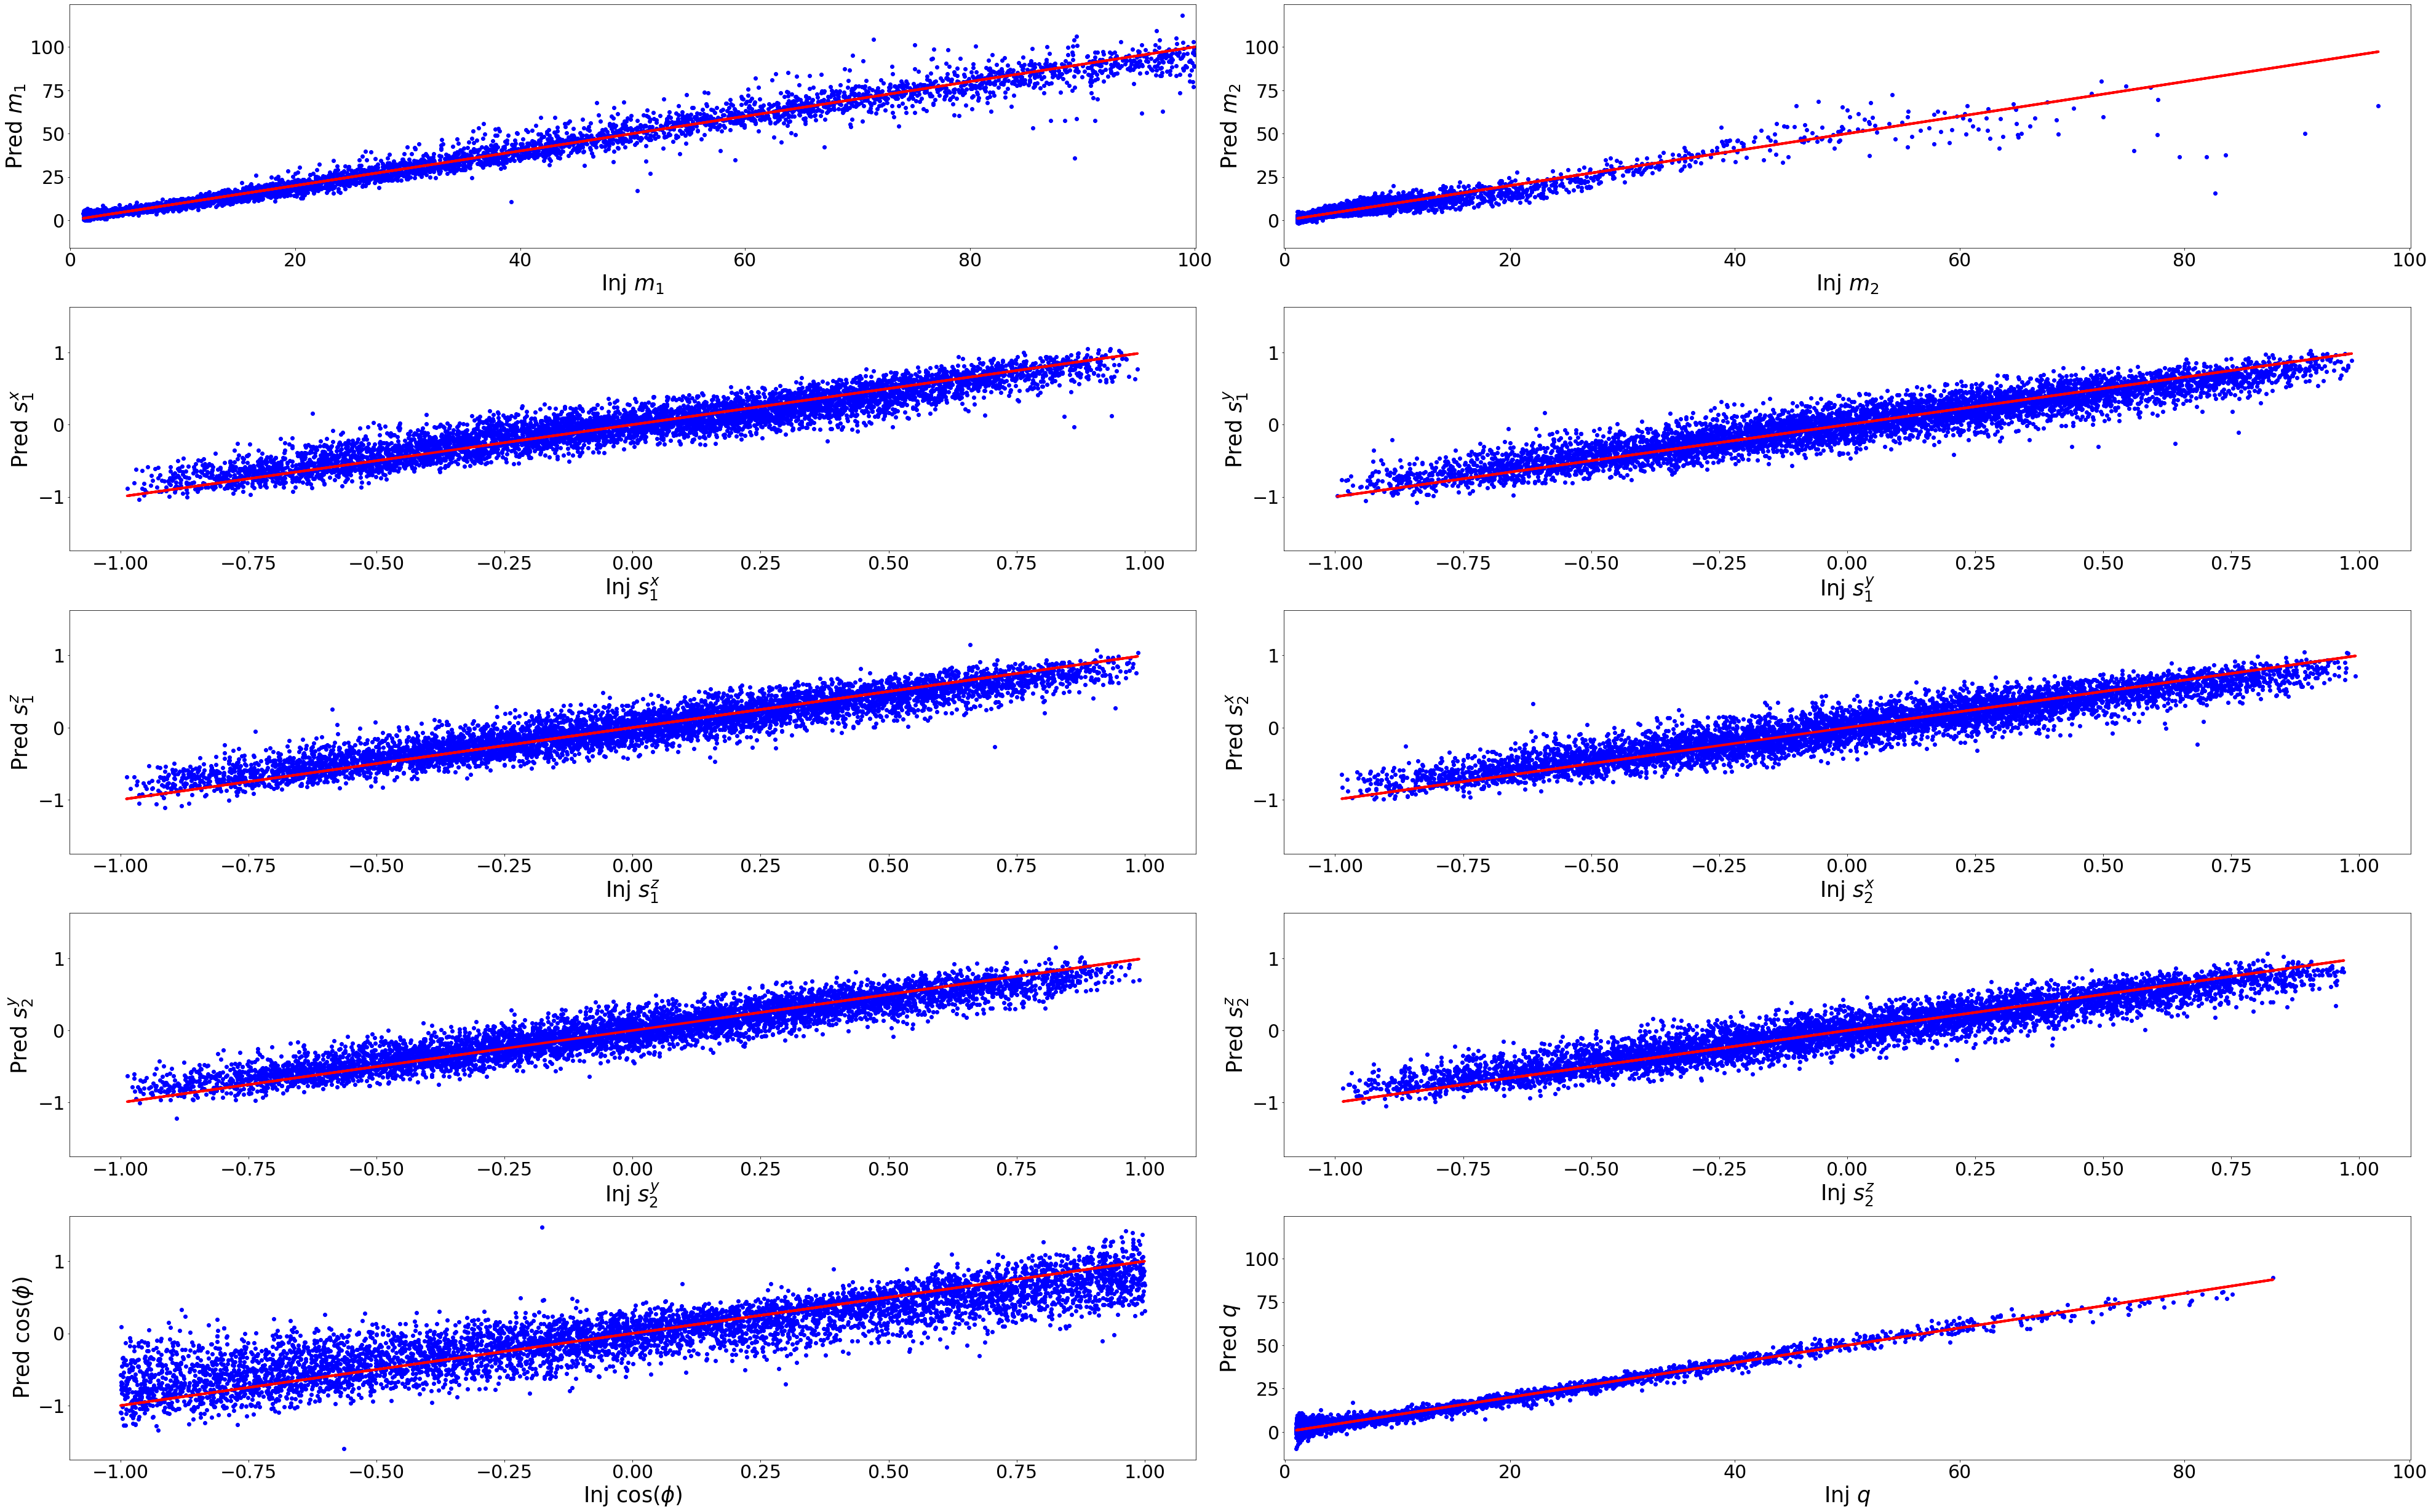

In [8]:
plot_all(ytest, predicted_data, 'test', 'v0c0')